In [1]:
# will be used for detectron2 fasterrcnn model zoo name
from sahi.utils.detectron2 import Detectron2TestConstants

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction, predict, get_prediction
from sahi.utils.file import download_from_url
from sahi.utils.cv import read_image
from IPython.display import Image

In [6]:
cd "/home/zhangh/medchallenge/Testing/TestingColab"

/home/zhangh/medchallenge/Testing/TestingColab


In [11]:
# set detectron2 fasterrcnn model zoo name
model_path = Detectron2TestConstants.FASTERCNN_MODEL_ZOO_NAME

In [12]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='detectron2',
    model_path=model_path,
    config_path=model_path,
    confidence_threshold=0.5,
    image_size=640,
    device="cpu", # or 'cuda:0'
)

11/06/2024 14:47:47 - INFO - detectron2.checkpoint.detection_checkpoint -   [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...
11/06/2024 14:47:47 - INFO - iopath.common.file_io -   URL https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl cached in /home/zhangh/.torch/iopath_cache/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl
11/06/2024 14:47:47 - INFO - fvcore.common.checkpoint -   [Checkpointer] Loading from /home/zhangh/.torch/iopath_cache/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...
11/06/2024 14:47:47 - INFO - fvcore.common.checkpoint -   Reading a file from 'Detectron2 Model Zoo'


In [8]:
# Define paths to your trained model and its config file
model_path = "/home/zhangh/medchallenge/Testing/TestingColab/output/import/model_final.pth"
config_path = "/home/zhangh/medchallenge/Testing/TestingColab/output/import/config.yaml"

# Initialize the detection model with custom parameters
detection_model = AutoDetectionModel.from_pretrained(
    model_type='detectron2',
    model_path=model_path,
    config_path=config_path,
    confidence_threshold=0.5,   # Adjust confidence threshold as needed
    image_size=640,             # Adjust image size if your model requires it
    device="cuda"               # Use 'cuda' for GPU if available, or 'cpu' otherwise
)


/home/zhangh/medchallenge/Testing/TestingColab/output/import/config.yaml not available in Model Zoo!


KeyError: 'Non-existent config key: MODEL.DiffusionDet'

In [13]:
result = get_prediction("/home/zhangh/medchallenge/Testing/TestingColab/dataset/TinyPerson/train/baidu_P000_4_jpg.rf.f61e1aab497586b6922b791be881e338.jpg", detection_model)

In [52]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

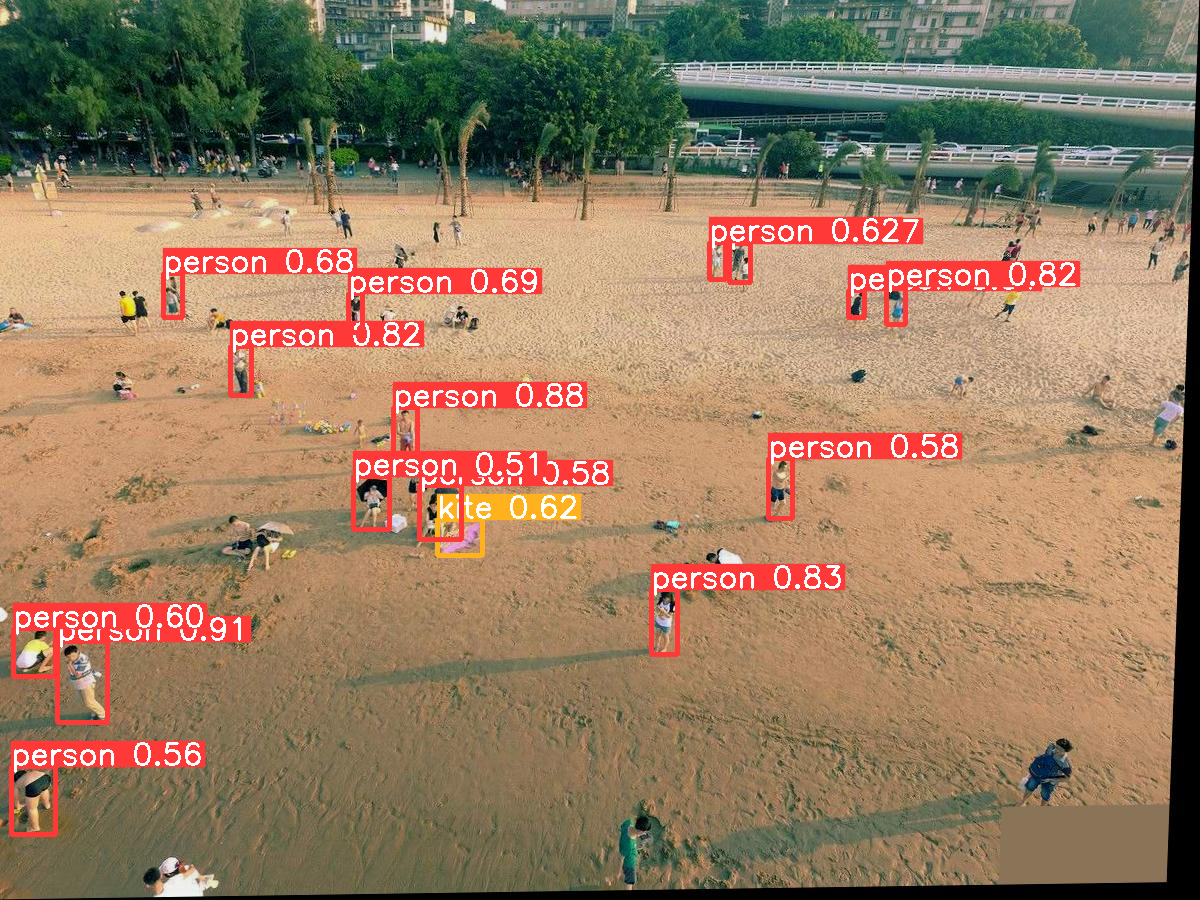

In [14]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [15]:
result = get_sliced_prediction(
    "/home/zhangh/medchallenge/Testing/TestingColab/dataset/TinyPerson/train/baidu_P000_4_jpg.rf.f61e1aab497586b6922b791be881e338.jpg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

Performing prediction on 30 slices.


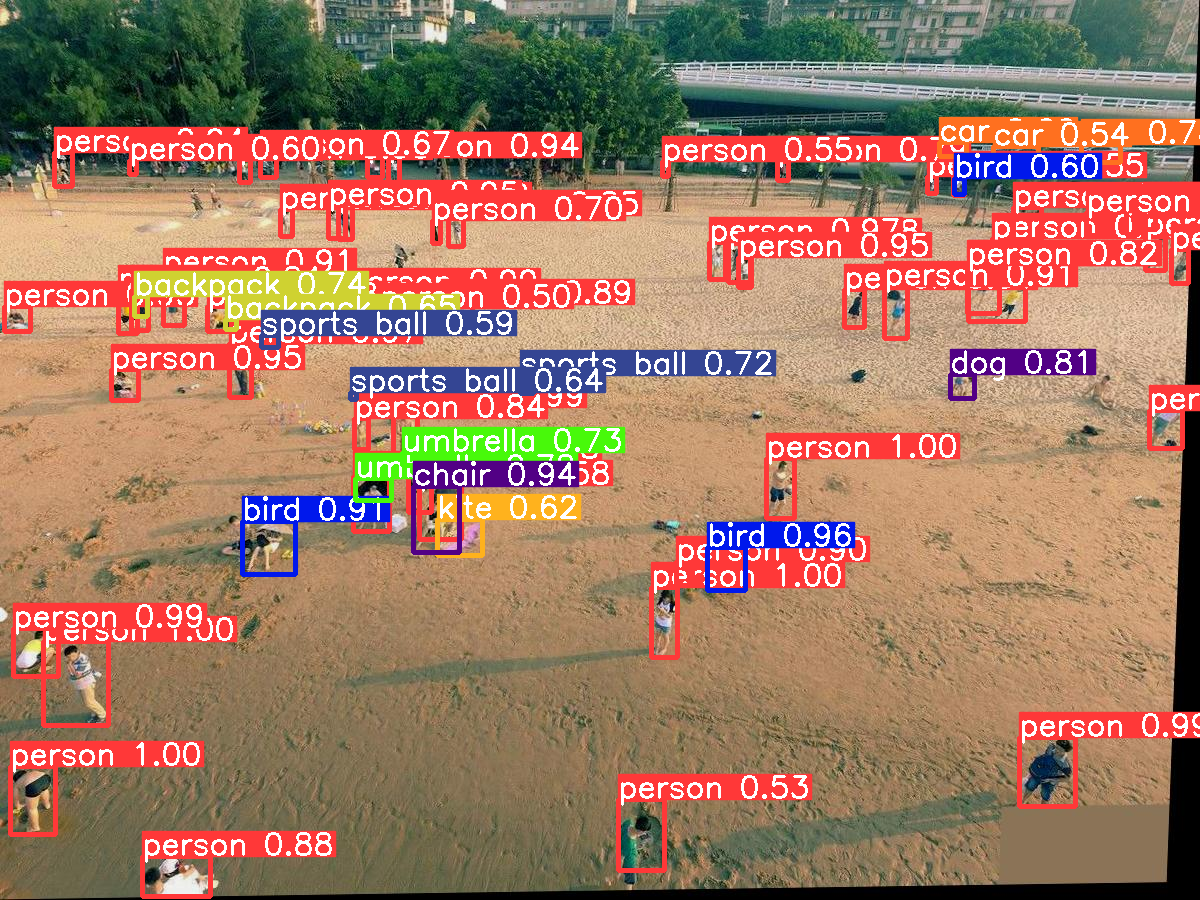

In [16]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")